In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
# df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

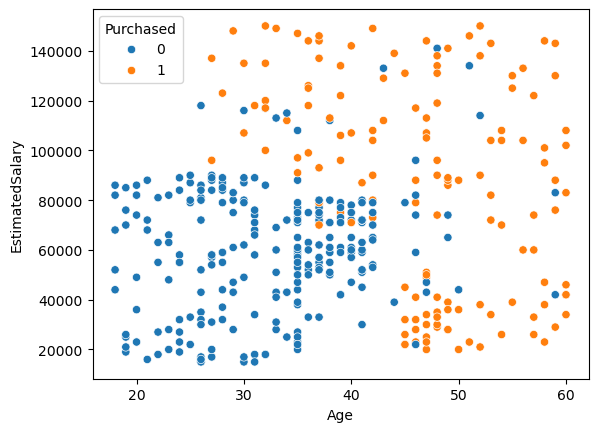

In [6]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=df['Purchased'])
plt.show()

In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 132.1313 - accuracy: 0.5719 - val_loss: 109.5630 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 61.8577 - accuracy: 0.5344 - val_loss: 72.5644 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 45.0265 - accuracy: 0.4906 - val_loss: 81.8063 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 74.0228 - accuracy: 0.4719 - val_loss: 102.6693 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 154.4870 - accuracy: 0.5031 - val_loss: 4.3300 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 145.5203 - accuracy: 0.5656 - val_loss: 200.3248 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 77.7369 - accuracy: 0.4781 - val_loss: 51.9604 - val_accuracy: 

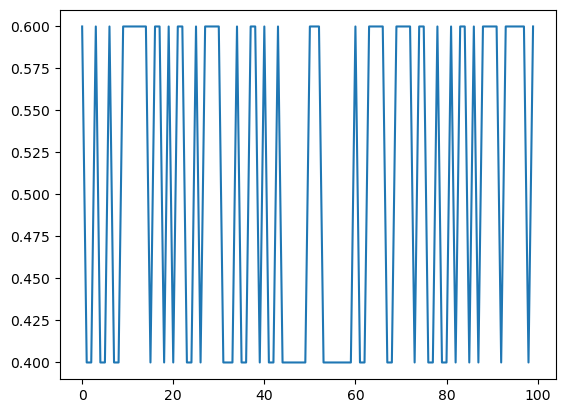

In [14]:
plt.plot(history.history['val_accuracy'])
plt.show()

In [15]:
# Applying scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

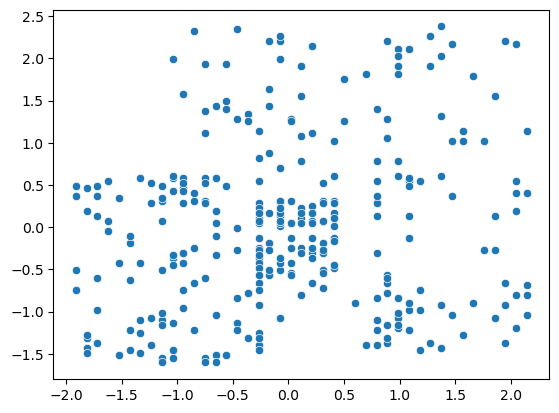

In [17]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])
plt.show()

In [18]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
import time
start = time.time()
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)
end = time.time()
print('TRAINING_TIME : ',abs(int(start-end)))

Epoch 1/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6564 - accuracy: 0.6781 - val_loss: 0.6197 - val_accuracy: 0.8000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.8219 - val_loss: 0.5650 - val_accuracy: 0.8250
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.8500 - val_loss: 0.5197 - val_accuracy: 0.8000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.8469 - val_loss: 0.4807 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8469 - val_loss: 0.4473 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.8500 - val_loss: 0.4193 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8250
Epoch 8/100


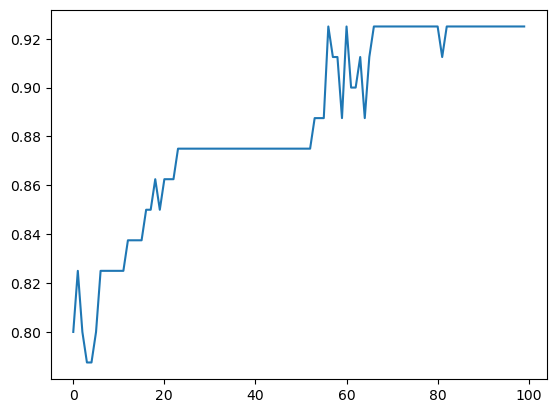

In [22]:
plt.plot(history.history['val_accuracy'])